# ***DataFrame对象  数据框***

In [1]:
import numpy as np
import pandas as pd

# 一、表合并

## 1.纵向合并

In [2]:
# 运用append 方法
np.random.seed(10)
data1=pd.DataFrame(np.random.randint(10,100,(4,5)),
                   columns=list('abcde'))
np.random.seed(20)
data2=pd.DataFrame(np.random.randint(10,100,(4,5)),
                   columns=list('abcde'))

In [3]:
data1

,a,b,c,d,e
0,19,25,74,38,99
1,39,18,83,10,50
2,46,26,21,64,98
3,72,43,82,88,59


In [4]:
data2

,a,b,c,d,e
0,25,38,19,30,85
1,32,81,44,50,95
2,36,93,26,72,26
3,17,16,36,23,85


In [5]:
data3=data2.append(data1)
data3

,a,b,c,d,e
0,25,38,19,30,85
1,32,81,44,50,95
2,36,93,26,72,26
3,17,16,36,23,85
0,19,25,74,38,99
1,39,18,83,10,50
2,46,26,21,64,98
3,72,43,82,88,59


In [6]:
# 纵向合并后，需要重置索引
data3.reset_index()
data3

,a,b,c,d,e
0,25,38,19,30,85
1,32,81,44,50,95
2,36,93,26,72,26
3,17,16,36,23,85
0,19,25,74,38,99
1,39,18,83,10,50
2,46,26,21,64,98
3,72,43,82,88,59


In [7]:
# 连续两次的重置索引则表示复原
data3.reset_index().reset_index()
data3

,a,b,c,d,e
0,25,38,19,30,85
1,32,81,44,50,95
2,36,93,26,72,26
3,17,16,36,23,85
0,19,25,74,38,99
1,39,18,83,10,50
2,46,26,21,64,98
3,72,43,82,88,59


In [8]:
data4=data2.append(data1,ignore_index=True)
data4

,a,b,c,d,e
0,25,38,19,30,85
1,32,81,44,50,95
2,36,93,26,72,26
3,17,16,36,23,85
4,19,25,74,38,99
5,39,18,83,10,50
6,46,26,21,64,98
7,72,43,82,88,59


## 1.1**append 方法总结**
- 两个形状相同的数据框进行纵向合并
    - append 
        - 参数ignore_index 表示合并时忽略前面的索引，会重新进行索引排序
        - help(data1.append) 查看数据框的append的用法及所需的参数       

## 1.2.pd.concat

In [9]:
data5=pd.concat([data1,data2],axis=0, #默认按列
                ignore_index=True)

In [10]:
data5

,a,b,c,d,e
0,19,25,74,38,99
1,39,18,83,10,50
2,46,26,21,64,98
3,72,43,82,88,59
4,25,38,19,30,85
5,32,81,44,50,95
6,36,93,26,72,26
7,17,16,36,23,85


In [11]:
# help(pd.concat)

- ## 2.横向合并
    - pd.concat 不太符合数据合并的习惯，不建议用这个方法进行横向合并 
    - ### ***pd.merge***  推荐使用 merge方法

In [12]:
# 也介绍一下pd.concat方法
pd.concat([data1,data2],axis=1,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9
0,19,25,74,38,99,25,38,19,30,85
1,39,18,83,10,50,32,81,44,50,95
2,46,26,21,64,98,36,93,26,72,26
3,72,43,82,88,59,17,16,36,23,85


 pd.merge

In [13]:
in1=pd.read_excel('individual1.xlsx')
in2=pd.read_excel('individual2.xlsx')

In [14]:
family=pd.read_excel('family.xlsx')

In [15]:
in1

,fid,pid,性别,年龄
0,f00001,1,女,20
1,f00001,2,男,35
2,f00001,3,女,46
3,f00003,4,男,3
4,f00003,5,女,78
5,f00003,6,男,9
6,f00003,7,女,21
7,f00002,8,男,16
8,f00002,9,女,59
9,f00002,10,男,63


In [16]:
in2

,fid,pid,受教育程度,年龄
0,f00001,2,2,NaN
1,f00001,3,1,46.0
2,f00003,4,0,3.0
3,f00003,5,0,78.0
4,f00003,6,1,9.0
5,f00003,7,2,21.0
6,f00002,8,2,16.0
7,f00002,9,1,59.0


In [17]:
family

,fid,地域编码
0,f00001,a1
1,f00003,a2
2,f00002,a2


## 1:1合并

将编码改写成7位数字
- str().zfill(n) 将其填充成几位的，不足的用0填补

In [18]:
in1['pid']=in1['pid'].map(lambda x:str(x).zfill(7))
in1

,fid,pid,性别,年龄
0,f00001,0000001,女,20
1,f00001,0000002,男,35
2,f00001,0000003,女,46
3,f00003,0000004,男,3
4,f00003,0000005,女,78
5,f00003,0000006,男,9
6,f00003,0000007,女,21
7,f00002,0000008,男,16
8,f00002,0000009,女,59
9,f00002,0000010,男,63


In [19]:
in2['pid']=in2['pid'].map(lambda x:str(x).zfill(7))

In [20]:
in2

,fid,pid,受教育程度,年龄
0,f00001,0000002,2,NaN
1,f00001,0000003,1,46.0
2,f00003,0000004,0,3.0
3,f00003,0000005,0,78.0
4,f00003,0000006,1,9.0
5,f00003,0000007,2,21.0
6,f00002,0000008,2,16.0
7,f00002,0000009,1,59.0


In [21]:
data3=pd.merge(in1,in2,left_on='pid',right_on='pid',
             how='outer',suffixes=('_1','_2')) #相同项的前缀设置
data3

,fid_1,pid,性别,年龄_1,fid_2,受教育程度,年龄_2
0,f00001,0000001,女,20,NaN,NaN,NaN
1,f00001,0000002,男,35,f00001,2.0,NaN
2,f00001,0000003,女,46,f00001,1.0,46.0
3,f00003,0000004,男,3,f00003,0.0,3.0
4,f00003,0000005,女,78,f00003,0.0,78.0
5,f00003,0000006,男,9,f00003,1.0,9.0
6,f00003,0000007,女,21,f00003,2.0,21.0
7,f00002,0000008,男,16,f00002,2.0,16.0
8,f00002,0000009,女,59,f00002,1.0,59.0
9,f00002,0000010,男,63,NaN,NaN,NaN


## m:1合并

In [22]:
# 将fid_2删除
data3.drop(['fid_2'],axis=1,inplace=True,errors='ignore')
data3

,fid_1,pid,性别,年龄_1,受教育程度,年龄_2
0,f00001,0000001,女,20,NaN,NaN
1,f00001,0000002,男,35,2.0,NaN
2,f00001,0000003,女,46,1.0,46.0
3,f00003,0000004,男,3,0.0,3.0
4,f00003,0000005,女,78,0.0,78.0
5,f00003,0000006,男,9,1.0,9.0
6,f00003,0000007,女,21,2.0,21.0
7,f00002,0000008,男,16,2.0,16.0
8,f00002,0000009,女,59,1.0,59.0
9,f00002,0000010,男,63,NaN,NaN


In [23]:
# 并将fid_1命名为fid
# 列名的重命名
data3.rename(columns={'fid_1':'fid'},inplace=True)
data3

,fid,pid,性别,年龄_1,受教育程度,年龄_2
0,f00001,0000001,女,20,NaN,NaN
1,f00001,0000002,男,35,2.0,NaN
2,f00001,0000003,女,46,1.0,46.0
3,f00003,0000004,男,3,0.0,3.0
4,f00003,0000005,女,78,0.0,78.0
5,f00003,0000006,男,9,1.0,9.0
6,f00003,0000007,女,21,2.0,21.0
7,f00002,0000008,男,16,2.0,16.0
8,f00002,0000009,女,59,1.0,59.0
9,f00002,0000010,男,63,NaN,NaN


In [24]:
# 深复制一份
data4=data3.copy(deep=True)
data4

,fid,pid,性别,年龄_1,受教育程度,年龄_2
0,f00001,0000001,女,20,NaN,NaN
1,f00001,0000002,男,35,2.0,NaN
2,f00001,0000003,女,46,1.0,46.0
3,f00003,0000004,男,3,0.0,3.0
4,f00003,0000005,女,78,0.0,78.0
5,f00003,0000006,男,9,1.0,9.0
6,f00003,0000007,女,21,2.0,21.0
7,f00002,0000008,男,16,2.0,16.0
8,f00002,0000009,女,59,1.0,59.0
9,f00002,0000010,男,63,NaN,NaN


#### 定义函数  用年龄_2去填充年龄_1

In [25]:
def f(x):
    v1=x['年龄_2']   # 反之返回年龄2
    if pd.isna(x['年龄_2']): # 判断年龄2为若为空值则返回年龄1
        v1=x['年龄_1']  
    return v1

In [26]:
data3['年龄']=data3.apply(f,axis=1)

In [27]:
data3

,fid,pid,性别,年龄_1,受教育程度,年龄_2,年龄
0,f00001,0000001,女,20,NaN,NaN,20.0
1,f00001,0000002,男,35,2.0,NaN,35.0
2,f00001,0000003,女,46,1.0,46.0,46.0
3,f00003,0000004,男,3,0.0,3.0,3.0
4,f00003,0000005,女,78,0.0,78.0,78.0
5,f00003,0000006,男,9,1.0,9.0,9.0
6,f00003,0000007,女,21,2.0,21.0,21.0
7,f00002,0000008,男,16,2.0,16.0,16.0
8,f00002,0000009,女,59,1.0,59.0,59.0
9,f00002,0000010,男,63,NaN,NaN,63.0


### fillna 中的其他列填补

In [28]:
# 用年龄_2去以填充年龄1
data4['age']=data4.年龄_1.fillna(data4.年龄_2)
data4

,fid,pid,性别,年龄_1,受教育程度,年龄_2,age
0,f00001,0000001,女,20,NaN,NaN,20
1,f00001,0000002,男,35,2.0,NaN,35
2,f00001,0000003,女,46,1.0,46.0,46
3,f00003,0000004,男,3,0.0,3.0,3
4,f00003,0000005,女,78,0.0,78.0,78
5,f00003,0000006,男,9,1.0,9.0,9
6,f00003,0000007,女,21,2.0,21.0,21
7,f00002,0000008,男,16,2.0,16.0,16
8,f00002,0000009,女,59,1.0,59.0,59
9,f00002,0000010,男,63,NaN,NaN,63


In [29]:
# 查看数据框中的数据类型
data4.dtypes

fid       object
pid       object
性别        object
年龄_1       int64
受教育程度    float64
年龄_2     float64
age        int64
dtype: object

In [30]:
data3.drop(columns=['年龄_1','年龄_2'],inplace=True)

In [31]:
data3

,fid,pid,性别,受教育程度,年龄
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0
5,f00003,0000006,男,1.0,9.0
6,f00003,0000007,女,2.0,21.0
7,f00002,0000008,男,2.0,16.0
8,f00002,0000009,女,1.0,59.0
9,f00002,0000010,男,NaN,63.0


In [32]:
# merge 合并
pd.merge(data3,family,left_on='fid',right_on='fid',how='outer',
         suffixes=('_i','_f'))

,fid,pid,性别,受教育程度,年龄,地域编码
0,f00001,0000001,女,NaN,20.0,a1
1,f00001,0000002,男,2.0,35.0,a1
2,f00001,0000003,女,1.0,46.0,a1
3,f00003,0000004,男,0.0,3.0,a2
4,f00003,0000005,女,0.0,78.0,a2
5,f00003,0000006,男,1.0,9.0,a2
6,f00003,0000007,女,2.0,21.0,a2
7,f00002,0000008,男,2.0,16.0,a2
8,f00002,0000009,女,1.0,59.0,a2
9,f00002,0000010,男,NaN,63.0,a2


#### ***将整理好的数据导出***

In [33]:
data3.to_csv('data3.csv',index=False) #index=False 不加索引

# 二、排序
- sort_values 按某列的值进行排序
- sort_index  #按索引进行排序

In [34]:
data3.sort_values(by='fid',ascending=False)

,fid,pid,性别,受教育程度,年龄
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0
5,f00003,0000006,男,1.0,9.0
6,f00003,0000007,女,2.0,21.0
7,f00002,0000008,男,2.0,16.0
8,f00002,0000009,女,1.0,59.0
9,f00002,0000010,男,NaN,63.0
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0


In [35]:
data3.sort_values(by=['fid','pid'])

,fid,pid,性别,受教育程度,年龄
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0
7,f00002,0000008,男,2.0,16.0
8,f00002,0000009,女,1.0,59.0
9,f00002,0000010,男,NaN,63.0
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0
5,f00003,0000006,男,1.0,9.0
6,f00003,0000007,女,2.0,21.0


In [36]:
data3.sort_index(ascending=True)

,fid,pid,性别,受教育程度,年龄
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0
5,f00003,0000006,男,1.0,9.0
6,f00003,0000007,女,2.0,21.0
7,f00002,0000008,男,2.0,16.0
8,f00002,0000009,女,1.0,59.0
9,f00002,0000010,男,NaN,63.0


In [37]:
data3.sort_index(ascending=False)

,fid,pid,性别,受教育程度,年龄
9,f00002,0000010,男,NaN,63.0
8,f00002,0000009,女,1.0,59.0
7,f00002,0000008,男,2.0,16.0
6,f00003,0000007,女,2.0,21.0
5,f00003,0000006,男,1.0,9.0
4,f00003,0000005,女,0.0,78.0
3,f00003,0000004,男,0.0,3.0
2,f00001,0000003,女,1.0,46.0
1,f00001,0000002,男,2.0,35.0
0,f00001,0000001,女,NaN,20.0


# 三、描述统计
- 变量描述统计
- 变量的唯一值
- 变量的计数统计 value_counts

In [38]:
# 描述统计
data3.describe()

,受教育程度,年龄
count,8.000000,10.000000
mean,1.125000,35.000000
std,0.834523,25.412158
min,0.000000,3.000000
25%,0.750000,17.000000
50%,1.000000,28.000000
75%,2.000000,55.750000
max,2.000000,78.000000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt 解决中文乱码的问题
plt.rcParams['font.sans-serif']='SimHei' #黑体
plt.rcParams['axes.unicode_minus']=False #设置正常显示字符

In [40]:
# sns的绘图风格及解决中文乱码格式
sns.set_style("darkgrid", #设置画图风格
              {"font.sans-serif":['simhei','Droid Sans Fallback']})

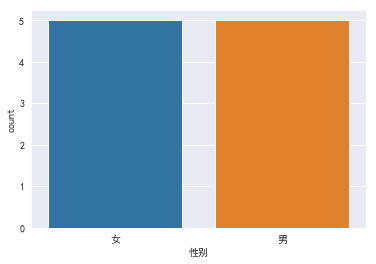

In [41]:
sns.countplot(data3['性别'],data=data3);

In [42]:
# 变量唯一值
data3['性别'].unique()

array(['女', '男'], dtype=object)

In [43]:
# 计数
data3['性别'].value_counts()
# 默认进行频数的降序排序

女    5
男    5
Name: 性别, dtype: int64

In [44]:
# 查看变量值统计的用法
help(data3['性别'].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values.
    ascending : boolean, default False
        Sort in ascending order.
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series

# 四、数据框的分组 groupby

### 1.分组汇总
- max min mean median sum quantile（分位数） var std skew（偏态） 等

In [45]:
# 依据一个分组变量
data3['性别'].groupby(data3['性别']).max()

性别
女    女
男    男
Name: 性别, dtype: object

In [46]:
data3['性别'].groupby(data3['fid']).max()

fid
f00001    男
f00002    男
f00003    男
Name: 性别, dtype: object

### 2.分组描述

In [47]:
data3['性别'].groupby(data3['性别']).describe()

,count,unique,top,freq
性别,,,,
女,5,1,女,5
男,5,1,男,5


In [48]:
data3.groupby(data3['性别']).describe()

受教育程度                                               年龄                   \
   count  mean       std  min   25%  50%   75%  max count  mean        std   
性别                                                                           
女    4.0  1.00  0.816497  0.0  0.75  1.0  1.25  2.0   5.0  44.8  24.933913   
男    4.0  1.25  0.957427  0.0  0.75  1.5  2.00  2.0   5.0  25.2  24.314605   

                                  
     min   25%   50%   75%   max  
性别                                
女   20.0  21.0  46.0  59.0  78.0  
男    3.0   9.0  16.0  35.0  63.0

### 3.分组对象的聚合方法  agg函数

In [49]:
data3[['年龄','受教育程度']].groupby(data3.性别).agg(['mean','max','min','std'])

年龄                        受教育程度                    
    mean   max   min        std  mean  max  min       std
性别                                                       
女   44.8  78.0  20.0  24.933913  1.00  2.0  0.0  0.816497
男   25.2  63.0   3.0  24.314605  1.25  2.0  0.0  0.957427

In [50]:
data3[['年龄','受教育程度']].groupby(data3.性别).agg(np.max)

,年龄,受教育程度
性别,,
女,78.0,2.0
男,63.0,2.0


In [51]:
data3['年龄'].groupby(data3.性别).agg([lambda x:np.quantile(x,0.5)])
# 此处的分位数的数值只能设置一个

,<lambda>
性别,
女,46.0
男,16.0


### 3.分组对象的聚合方法  transform函数
- 与agg的区别在于transform返回对象的长度和数据框的行数相等
- 索引和原数据框或序列索引保持一致
- 一次只能输入一个聚合函数  需要运用numpy库中的聚合函数

In [52]:
# 返回按性别分的年龄的均值
data3.年龄.groupby(data3.性别).transform(np.mean)
# data3['年龄'].groupby([data3['性别']]).transform(np.mean)

0    44.8
1    25.2
2    44.8
3    25.2
4    44.8
5    25.2
6    44.8
7    25.2
8    44.8
9    25.2
Name: 年龄, dtype: float64

lambda 函数自定义

In [53]:
data3.年龄.groupby(data3.性别).transform(lambda x:x.count())

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: 年龄, dtype: float64

In [54]:
print(dir(data3.性别))
# count函数

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod_

### 4.数据透视表  pivot_table函数

In [55]:
pt=data3.pivot_table(values=['年龄','受教育程度'],
                     index=['fid','性别'],
                     aggfunc={'年龄':[np.mean,np.max],'受教育程度':np.mean})

In [56]:
pt

受教育程度    年龄      
           mean  amax  mean
fid    性别                  
f00001 女    1.0  46.0  33.0
       男    2.0  35.0  35.0
f00002 女    1.0  59.0  59.0
       男    2.0  63.0  39.5
f00003 女    1.0  78.0  49.5
       男    0.5   9.0   6.0

# 五、变量与索引的相互转化

### 5.1列变成索引
- **set_index**

In [57]:
data3

,fid,pid,性别,受教育程度,年龄
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0
5,f00003,0000006,男,1.0,9.0
6,f00003,0000007,女,2.0,21.0
7,f00002,0000008,男,2.0,16.0
8,f00002,0000009,女,1.0,59.0
9,f00002,0000010,男,NaN,63.0


In [58]:
data3.set_index('fid',drop=False).head()

,fid,pid,性别,受教育程度,年龄
fid,,,,,
f00001,f00001,0000001,女,NaN,20.0
f00001,f00001,0000002,男,2.0,35.0
f00001,f00001,0000003,女,1.0,46.0
f00003,f00003,0000004,男,0.0,3.0
f00003,f00003,0000005,女,0.0,78.0


In [59]:
d1=data3.set_index('fid').head()
d1
# 默认将转化成索引的原来那一列删除 drop=True

,pid,性别,受教育程度,年龄
fid,,,,
f00001,0000001,女,NaN,20.0
f00001,0000002,男,2.0,35.0
f00001,0000003,女,1.0,46.0
f00003,0000004,男,0.0,3.0
f00003,0000005,女,0.0,78.0


### 5.2索引变成列
- **reset_index** 重置索引
- **reset_index().reset_index()** 恢复到最初的状态

In [60]:
d1.reset_index()

,fid,pid,性别,受教育程度,年龄
0,f00001,0000001,女,NaN,20.0
1,f00001,0000002,男,2.0,35.0
2,f00001,0000003,女,1.0,46.0
3,f00003,0000004,男,0.0,3.0
4,f00003,0000005,女,0.0,78.0


In [61]:
d1.reset_index().reset_index()

,index,fid,pid,性别,受教育程度,年龄
0,0,f00001,0000001,女,NaN,20.0
1,1,f00001,0000002,男,2.0,35.0
2,2,f00001,0000003,女,1.0,46.0
3,3,f00003,0000004,男,0.0,3.0
4,4,f00003,0000005,女,0.0,78.0


# 六、数值型变量离散化
- 实质：分箱

### 6.1 ***pd.cut***

In [62]:
# help(pd.cut)
data3['年龄分箱']=pd.cut(data3['年龄'],[0,45,59,74,89,120],
                     labels=['1','2','3','4','5'])

In [63]:
data3.head()

,fid,pid,性别,受教育程度,年龄,年龄分箱
0,f00001,0000001,女,NaN,20.0,1
1,f00001,0000002,男,2.0,35.0,1
2,f00001,0000003,女,1.0,46.0,2
3,f00003,0000004,男,0.0,3.0,1
4,f00003,0000005,女,0.0,78.0,4


### ***pd.qcut***
- 分位数进行分箱

In [64]:
data3['分位数分箱']=pd.qcut(data3['年龄'],4 #表示分成4部分
                       ,labels=list('1234'))

In [65]:
data3

,fid,pid,性别,受教育程度,年龄,年龄分箱,分位数分箱
0,f00001,0000001,女,NaN,20.0,1,2
1,f00001,0000002,男,2.0,35.0,1,3
2,f00001,0000003,女,1.0,46.0,2,3
3,f00003,0000004,男,0.0,3.0,1,1
4,f00003,0000005,女,0.0,78.0,4,4
5,f00003,0000006,男,1.0,9.0,1,1
6,f00003,0000007,女,2.0,21.0,1,2
7,f00002,0000008,男,2.0,16.0,1,1
8,f00002,0000009,女,1.0,59.0,2,4
9,f00002,0000010,男,NaN,63.0,3,4


#### pd.cut 与pd.qcut得到的结果是不一样的

# 七、分类变量转变成虚拟变量  pd.get_dummies

In [66]:
# pd.get_dummies(data,
#     prefix=None,
#     prefix_sep='_',
#     dummy_na=False,
#     columns=None,
#     sparse=False,
#     drop_first=False,
#     dtype=None,)

In [67]:
pd.get_dummies(data3['性别'])

,女,男
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [68]:
# prefix 添加前缀
pd.get_dummies(data3['性别'],prefix='性别')

,性别_女,性别_男
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [69]:
pd.concat([data3,pd.get_dummies(data3['性别'])],axis=1)

,fid,pid,性别,受教育程度,年龄,年龄分箱,分位数分箱,女,男
0,f00001,0000001,女,NaN,20.0,1,2,1,0
1,f00001,0000002,男,2.0,35.0,1,3,0,1
2,f00001,0000003,女,1.0,46.0,2,3,1,0
3,f00003,0000004,男,0.0,3.0,1,1,0,1
4,f00003,0000005,女,0.0,78.0,4,4,1,0
5,f00003,0000006,男,1.0,9.0,1,1,0,1
6,f00003,0000007,女,2.0,21.0,1,2,1,0
7,f00002,0000008,男,2.0,16.0,1,1,0,1
8,f00002,0000009,女,1.0,59.0,2,4,1,0
9,f00002,0000010,男,NaN,63.0,3,4,0,1


# 八、数据框的对象复制
- copy()  浅复制  一个变化，另一个也跟着变化
- copy(deep=True) 深复制  单独改变一方，另一方不受影响

In [70]:
data4=data3

In [71]:
data5=data3.copy(deep=True)

# 九、字符串的变量的常用的方法
- ***字符串的函数在此都能使用***
- .str.len()  长度
- .str.replace(old_str,new_str)  替换字符串
- .str.count(str) 统计某字符串出现的次数
- .str.zfill(n) 填补字符串  n为填补的几位

In [72]:
data6=pd.read_excel('整理好后的数据.xlsx')
data6

,fid,pid,性别,受教育程度,年龄,地域编码
0,f00001,1,女,NaN,20,a1
1,f00001,2,男,2.0,35,a1
2,f00001,3,女,1.0,46,a1
3,f00003,4,男,0.0,3,a2
4,f00003,5,女,0.0,78,a2
5,f00003,6,男,1.0,9,a2
6,f00003,7,女,2.0,21,a2
7,f00002,8,男,2.0,16,a2
8,f00002,9,女,1.0,59,a2
9,f00002,10,男,NaN,63,a2


In [73]:
data6['fid'].str.len()

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: fid, dtype: int64

In [74]:
data6['fid'].str.replace('f','*')

0    *00001
1    *00001
2    *00001
3    *00003
4    *00003
5    *00003
6    *00003
7    *00002
8    *00002
9    *00002
Name: fid, dtype: object

In [75]:
data6['fid'].count()
# 表明有10个fid

10

In [76]:
data6['fid'].str.count('0')
# 4个0

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: fid, dtype: int64

In [77]:
data6['pid']=data6['pid'].astype(str).str.zfill(5)

In [78]:
data6

,fid,pid,性别,受教育程度,年龄,地域编码
0,f00001,00001,女,NaN,20,a1
1,f00001,00002,男,2.0,35,a1
2,f00001,00003,女,1.0,46,a1
3,f00003,00004,男,0.0,3,a2
4,f00003,00005,女,0.0,78,a2
5,f00003,00006,男,1.0,9,a2
6,f00003,00007,女,2.0,21,a2
7,f00002,00008,男,2.0,16,a2
8,f00002,00009,女,1.0,59,a2
9,f00002,00010,男,NaN,63,a2


In [79]:
# 更多关于字符串的函数
print(dir(data6.fid.str))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_freeze', '_get_series_list', '_is_categorical', '_make_accessor', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'repeat', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'slice', 'slice_replace', 'split', 'startswith', 'strip', 'swapcase',

#### data6[''].str.extract 字符串正则表达式函数

In [80]:
# help(data6[''].str.extract)

In [81]:
series=pd.Series(['北京市海淀区','北京市朝阳区','上海市长宁区','上海市黄浦区'])

In [82]:
series

0    北京市海淀区
1    北京市朝阳区
2    上海市长宁区
3    上海市黄浦区
dtype: object

In [83]:
series.str.extract(r'(.+市)')

,0
0,北京市
1,北京市
2,上海市
3,上海市


# 十、删除重复项
- duplicated() 判断是否删除重复项
- drop_dupplicated()  删除重复项，只保留第一次出现的项
- 参数inplace
- 应用场景  常应用于取出某一列的重复项

In [84]:
np.random.seed(0)
data7=pd.DataFrame(np.random.randint(1,10,(5,4)),columns=list('abcd'))

In [85]:
data7

,a,b,c,d
0,6,1,4,4
1,8,4,6,3
2,5,8,7,9
3,9,2,7,8
4,8,9,2,6


In [86]:
data7.a.duplicated()
# 判断列a是否存在重复的项

0    False
1    False
2    False
3    False
4     True
Name: a, dtype: bool

In [87]:
# 删除列a存在的重复项
data7.a.drop_duplicates()

0    6
1    8
2    5
3    9
Name: a, dtype: int32

####  set集合天然有去重功能

In [88]:
set(data7['a'])

{5, 6, 8, 9}

# 十一、数据抽样

In [89]:
data8=pd.DataFrame(np.random.randn(1000,3),columns=list('xyz'))

In [90]:
data8.shape

(1000, 3)

In [91]:
data8_sam=data8.sample(frac=0.1)

In [92]:
data8_sam.shape

(100, 3)

In [93]:
data8_sam

,x,y,z
311,0.597379,0.805223,1.798328
929,1.102664,1.098800,-0.194269
846,1.503152,0.848399,0.418562
707,-1.753472,0.382122,0.814749
668,0.904877,0.179581,-0.128896
263,1.389745,-0.511202,-0.347808
462,0.367825,0.983578,-0.229501
57,0.476337,0.833880,1.313793
613,1.343847,-0.848585,-0.405267
202,-0.481480,-0.227773,-0.703187
